# <center>Project Proposal: Analysis and Prediction of Flight Delays</center>
#### **Authors:** Longfei Guan, Cheng Zhang, Heidi Lantz, Clare Pan
#### **Group:** 20

## 1. Introduction

In recent years, the air transport industry has grown rapidly. It promotes tourism, generates economic growth, and provides employment opportunities (Air Transport Action Group, 2022). However, there is no denying that flight delays are becoming more frequent. The Federal Aviation Administration (FAA) considers a flight to be delayed if it departs 15 minutes after the scheduled time (Trefis Team, 2016). Delays not only inconvenience passengers but also cost airlines billions of dollars and disrupt airport operations, damaging the airline's reputation (Wang et al., 2019). Because airline industries across the world take up a great part of the global economy, the number of flight delays could have a significant impact on customers’ satisfaction with the airlines. Therefore, it is important to investigate and understand the key factors that can influence flight delays. This project will use the 2015 Flight Delays and Cancellations dataset published by the U.S. Department of Transportation (2017) to investigate the possible variables that are associated with flight delays and make predictions about the average departure time delay based on the conclusion. 

The dataset includes 14 unique airlines from the United States, but for this project, we will select Delta Airlines as our subject. Delta Airlines is currently the second-largest airline in the world in terms of total U.S. passenger miles and passenger fleet size, and it is a founding member of the SkyTeam alliance, which has more than 325 destinations in 52 countries on six continents (Wikipedia, 2022). We suppose the study of Delta Airlines will be representative and generalizable for the US airline population. We will examine thirteen potential factors from a total of 31 variables that influence airline delays. These 13 variables include `MONTH`, `DAY`, `DAY_OF_WEEK`, `AIRLINE`, `ORIGIN_AIRPORT`, `DESTINATION_AIRPORT`, `SCHEDULED_DEPARTURE`, `DEPARTURE_TIME`, `DEPARTURE_DELAY`, `SCHEDULED_TIME`, `ELAPSED_TIME`, `AIR_TIME`, and `DISTANCE`. After determining which of the 13 factors can affect airplane delay times, we will use these variables to predict delta airline delay time. We mainly selected those variables because the size of the original dataset is too large and factored out the variables that have little to no effect on the final model, such as the airplane’s tail number, whether the flight was cancelled or not, etc. After determining which of the 13 factors can affect airplane delay times, we will use these variables to predict delta airline delay time.

<center><img src="image/flight_delay_image.jpeg"/></center>

**Figure 1** Image source: https://www.nortonrosefulbright.com/fr-ca/nrf-transform/client-stories/managing-flight-delay-claims 

- `MONTH`: month of the flight trips
- `DAY`: day of the Flight Trip
- `DAY_OF_WEEK`: day of week of the flight trip
- `AIRLINE`: airline identifier (in our dataset, only one airline: DL (Delta Airlines))
- `ORIGIN_AIRPORT`: starting airport
- `DESTINATION_AIRPORT`: destination airport
- `SCHEDULED_DEPARTUR`: planned departure time (format HHMM or HMM,  where HH or H = hour and MM = minutes)
- `DEPARTURE_TIME`: time of departure (format HHMM or HMM)
- `DEPARTURE_DELAY`: total delay on departure, in minutes (negative times represent early departures)
- `SCHEDULED_TIME`: planned time amount needed for the flight trip, in minutes
- `ELAPSED_TIME`: total flight duration, including taking off, air time, and landing, in minutes
- `AIR_TIME`: flight duration of the time in air, in minutes 
- `DISTANCE`: distance between two airports, in miles

## 2. Preliminary Results

### Loading relevant libraries

In [1]:
library (tidyverse)
library (repr)
library (infer)
library (broom)
library (GGally)
library (car)

options(warn=-1)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




### Reading & cleaning the datasets

* Since the origianl dataset is too huge(592.4MB), we selected and filtered the variables that we specified in the introduction. Then uploaded the dataset onto Github and loaded the data by read_csv(). 

In [2]:
flight_data <- read_csv("delta_flights.csv")
flight_data <- flight_data[complete.cases(flight_data), ] %>%
  select(-...1,- replicate,-AIRLINE)
head(flight_data)

New names:
• `` -> `...1`
Rows: 5000 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): AIRLINE, ORIGIN_AIRPORT, DESTINATION_AIRPORT
dbl (12): ...1, replicate, MONTH, DAY, DAY_OF_WEEK, SCHEDULED_DEPARTURE, DEP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,8,7,SLC,OAK,1505,1502,-3,115,120,102,588
1,27,2,PBI,DTW,1330,1401,31,181,169,153,1086
11,18,3,SLC,OAK,1500,1456,-4,110,106,89,588
11,2,1,DTW,DEN,1217,1210,-7,201,184,159,1123
4,9,4,MSY,ATL,715,711,-4,89,76,57,425
12,20,7,ATL,MEM,1454,1453,-1,85,68,58,332


**Table 1:** Modified version of the Flight Delay dataset. 

In [3]:
# total levels of the origin airport
cat("Number of Origin Airport levels =", nrow(count(flight_data, ORIGIN_AIRPORT)))

Number of Origin Airport levels = 231

In [4]:
# top 3 origin airports with their mean delay time
top_3_Origin_Airport_Counts <- count(flight_data, ORIGIN_AIRPORT) %>% filter(n >300)
top_3_Origin_Airport <- flight_data %>% 
filter (ORIGIN_AIRPORT == "ATL" | ORIGIN_AIRPORT == "DTW" | ORIGIN_AIRPORT == "MSP") %>%
group_by(ORIGIN_AIRPORT) %>%
summarize(mean = mean(DEPARTURE_DELAY))
cbind(top_3_Origin_Airport_Counts,top_3_Origin_Airport[,2])

ORIGIN_AIRPORT,n,mean
<chr>,<int>,<dbl>
ATL,1273,7.787117
DTW,304,10.582237
MSP,321,6.607477


**Table 2** Number of delayed flights and the average minutes of departure delay for the top 3 *origin airports* with the most data.

In [5]:
# total levels of the destination airport
cat("Number of Destination Airport levels =", nrow(count(flight_data, DESTINATION_AIRPORT)))

Number of Destination Airport levels = 229

In [6]:
# top 3 destination airports with their mean delay time
top_3_Destination_Airport_Counts <- count(flight_data, DESTINATION_AIRPORT) %>% filter(n >300)
top_3_Destination_Airport <- flight_data %>% 
filter (DESTINATION_AIRPORT == "ATL" | DESTINATION_AIRPORT == "DTW" | DESTINATION_AIRPORT == "MSP") %>%
group_by(DESTINATION_AIRPORT) %>%
summarize(mean = mean(DEPARTURE_DELAY))
cbind(top_3_Destination_Airport_Counts,top_3_Destination_Airport[,2])
flight_data <- flight_data %>%
  select(-ORIGIN_AIRPORT,-DESTINATION_AIRPORT)

DESTINATION_AIRPORT,n,mean
<chr>,<int>,<dbl>
ATL,1237,6.822150
DTW,316,5.446203
MSP,336,6.601190


**Table 3** Number of delayed flights and the average minutes of departure delay for the top 3 *destination airports* with the most data.

* We begin by checking for the association of the explanatory variables with the response variables. ggparis() could help us visualize it.
* There are too many distinct values in ORIGIN_AIRPORT and DESTINATION_AIRPORT, so we filter out these two categorical variables.

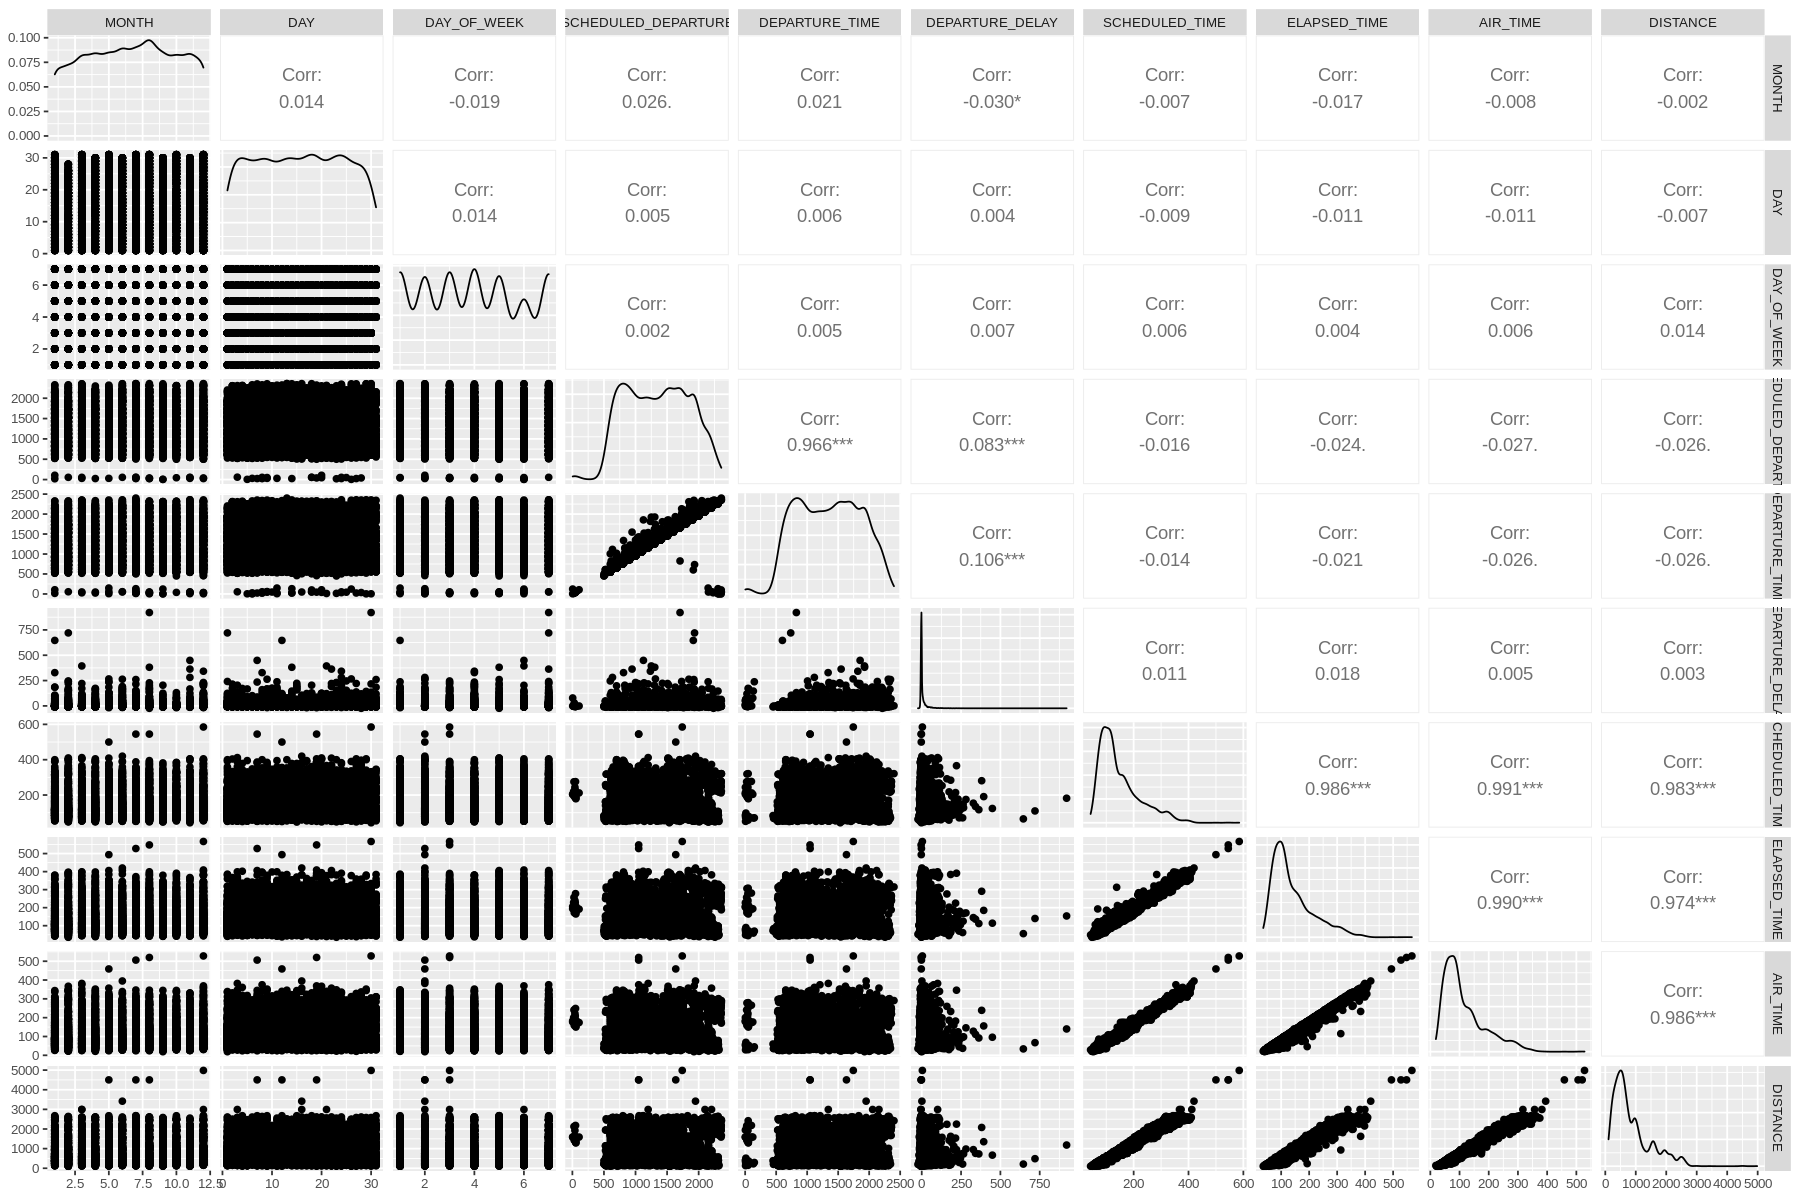

In [7]:
options(repr.plot.width = 15, repr.plot.height = 10)
flight_pair_plots <- flight_data%>% 
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
flight_pair_plots

**Figure 2** Pair plot for explanatory and response variables of `flight_data`

* DEPARTURE_DELAY is weakly correlated with all explanatory variables except for SCHEDULED_DEPARTURE and DEPARTURE_TIME.
* DEPARTURE_DELAY has a correlation coefficient value of 0.083 and 0.106 with SCHEDULED_DEPARTURE and DEPARTURE_TIME, respectively. The correlation coefficient value between DEPARTURE_DELAY and other explanatory variables are < 0.01.

### Exploratory Data Analysis

* We did the similar things here but we only compared explanatory variables.
* This will help us diagnose if there is multicollinearity issue in our model.

* In order to analysis the correlation between DEPARTURE_DELAY and the rest continous variables, we fliter out all categorical variables.

In [8]:
corr_matrix_flight <- flight_data %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")

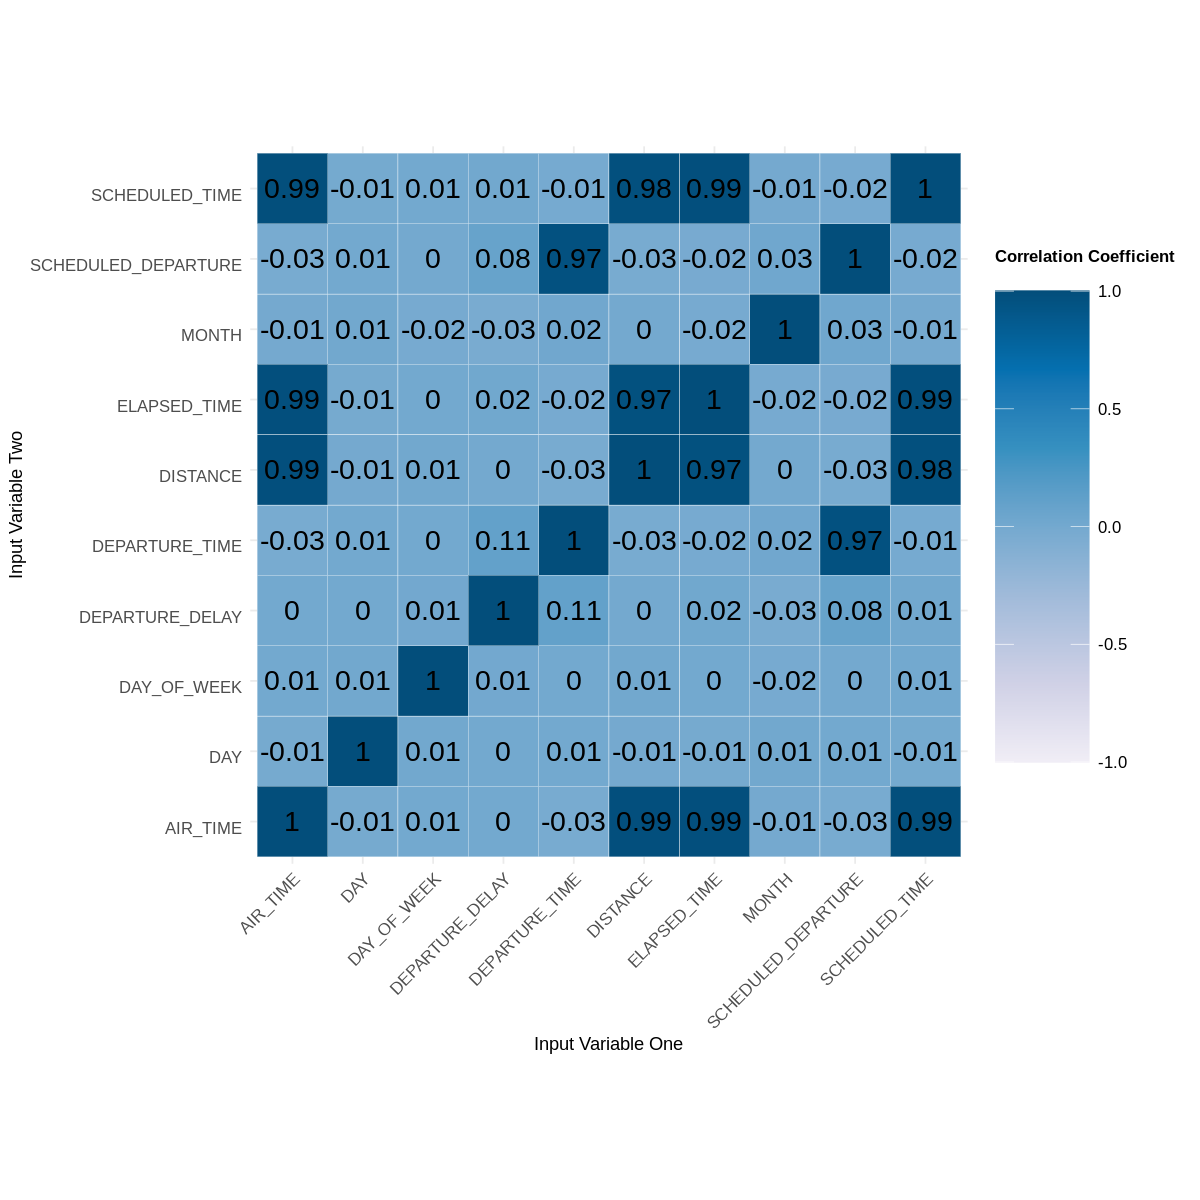

In [9]:
options(repr.plot.width = 10, repr.plot.height = 10)
corr_matrix_flight_plot <- corr_matrix_flight %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "PuBu",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "Input Variable One", y = "Input Variable Two") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 10, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 10, hjust = 1
    ),
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 10),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)
corr_matrix_flight_plot

**Figure 3** Correlation tiles between different inputs of `flight_data` variables. The darker values of blue shows that the corresponding input variable 1 and 2 have a strong positive correlation.

* There are several strong positive correlations in the graph, which suggests that there are multicollinearity among the explanatory variables.

### Summary Table

* We applied gather() to convert the dataset into a long format, then used summarise() to obtain summary statistic for all interested variables.

In [10]:
flight_data_long <- flight_data %>%
  gather(factor_key=TRUE)
flight_data_stats <- flight_data_long %>% group_by(key) %>%
  summarise(mean= mean(value), sd= sd(value), max = max(value),min = min(value))
flight_data_stats

key,mean,sd,max,min
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
MONTH,6.617771,3.352518,12,1
DAY,15.643386,8.766960,31,1
DAY_OF_WEEK,3.911547,1.997542,7,1
SCHEDULED_DEPARTURE,1352.474885,489.287661,2359,5
DEPARTURE_TIME,1354.181509,499.597830,2400,3
DEPARTURE_DELAY,7.293976,34.964328,921,-24
SCHEDULED_TIME,147.987192,74.202873,585,43
ELAPSED_TIME,140.667400,73.512602,567,36
AIR_TIME,115.853112,71.241288,528,19


**Table 2:** Summary statistics for all variables in `flight_data` 

* Since variables `MONTH`, `DAY`, and `DAY_OF_WEEK` are discrete variables, we descide to convert them into several binary variable in order for fitting the model.
* We convert variable `MONTH` into two binary variables: `SPRING`(1 <= MONTH <= 4), `SUMMER`(5 <= MONTH <= 8), and `WINTER`(9 <= MONTH <= 12).
* We convert variable `DAY` into three binary variables: `START_OF_MONTH`(1 <= DAY <= 10), `MIDDLE_OF_MONTH`(11 <= DAY <= 20), and `END_OF_MONTH`(21 <= DAY <= 31).
* We convert variable `DAY_OF_WEEK` into two variables: `BUSINESS_DAY`(1 <= DAY_OF_WEEK <= 5), and `HOILDAY`(6 <=  DAY_OF_WEEK <= 7).

In [11]:
flight_data <- within(flight_data, {   
  flight_day <- NA 
  flight_month <- NA 
  flight_day_of_week <- NA 
  flight_day[DAY <= 10] <- "START_OF_MONTH"
  flight_day[DAY >= 11 & DAY <= 20] <- "MIDDLE_OF_MONTH"
  flight_day[DAY >= 21] <- "END_OF_MONTH"
  flight_month[MONTH <= 4] <- "SPRING"
  flight_month[MONTH >= 5 & MONTH <= 8] <- "SUMMER"
  flight_month[MONTH >= 9] <- "WINTER"
  flight_day_of_week[DAY_OF_WEEK <= 5] <- "BUSINESS_DAY"
  flight_day_of_week[DAY_OF_WEEK > 5] <- "HOILDAY"
   } ) %>% select(-DAY,- MONTH,-DAY_OF_WEEK)

flight_data$flight_day <- as.factor(flight_data$flight_day)
flight_data$flight_month <- as.factor(flight_data$flight_month)
flight_data$flight_day_of_week <- as.factor(flight_data$flight_day_of_week)
 
head(flight_data)

SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,flight_day_of_week,flight_month,flight_day
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1505,1502,-3,115,120,102,588,HOILDAY,SPRING,START_OF_MONTH
1330,1401,31,181,169,153,1086,BUSINESS_DAY,SPRING,END_OF_MONTH
1500,1456,-4,110,106,89,588,BUSINESS_DAY,WINTER,MIDDLE_OF_MONTH
1217,1210,-7,201,184,159,1123,BUSINESS_DAY,WINTER,START_OF_MONTH
715,711,-4,89,76,57,425,BUSINESS_DAY,SPRING,START_OF_MONTH
1454,1453,-1,85,68,58,332,HOILDAY,WINTER,MIDDLE_OF_MONTH


**Table 3** Flight delay data with categorical variables

## 3. Methods and Results

In our analysis, we are predicting average flight delays for Delta’s airline in 2015. In this report, we began by loading our dataset from Kaggle, and tidying the data in order to select the variables and columns that we are investigating. For initial visualizations, we began by checking the correlation of variables, as we want to see which variables would be best to predict departure delay time. We made a correlation matrix plot which shows us that some variables are highly correlated. We could also tell that there exist some high amounts of multicollinearity between certain variables. 

We believe that this report is trustworthy because we have collected real data from a very large data set. From a sample of over 800,000 individual samples, we took a random sample of 5,000 to make sure we do not have a biased sample. We also believe that since there is so much data, we can create an accurate model that will allow us to have accurate predictions on delay time in flights. We will also be able to test our model to see how accurately it can predict departure delay.

We plan on making a predictive model to determine flight delay time for Delta airlines. We will be splitting our data set into test and training data, and then use the Lasso Regression method to generate a prediction model with potentially high accuracy. The Lasso Regression works well with the data this project uses because the flight delay data shows high multicollinearity as seen in the Preliminary Results section. The Lasso method would allow us to avoid overfitting the data by shrinking the coefficients.

We hope to achieve an accurate model that correctly predicts flight delays. This way, we can make true evaluations on flights with Delta and how likely your flight is to be delayed. This leads to a large impact because everyone can use this data in their own lives. For example, if we find that one airport location is a lot more likely to be delayed with delta, we may be more cautious and avoid flying there for a layover. Furthermore, you can use these calculations to compare with other airline companies to figure out which airline is the most reliable and has the least flight delays. There are many applications that are useful with this information and our analysis.



In [12]:
set.seed(0)
flight_data$ID <- 1:nrow(flight_data)
training_flight_data <- sample_n(flight_data, size = nrow(flight_data) * 0.7,
  replace = FALSE
)

testing_flight_data <- anti_join(flight_data,
  training_flight_data,
  by = "ID"
)
# I now remove the ID variable
#flight_data <- flight_data %>% select(-"ID")
training_flight_data <- training_flight_data %>% select(-"ID")
testing_flight_data <- testing_flight_data %>% select(-"ID")
model_matrix_X_train <- 
    model.matrix(DEPARTURE_DELAY ~ ., data = training_flight_data)[,-1]
matrix_Y_train <- 
    as.matrix(training_flight_data$DEPARTURE_DELAY, ncol = 1)
model_matrix_X_test <- 
    model.matrix(DEPARTURE_DELAY ~ ., data = testing_flight_data)[,-1]
matrix_Y_test <- 
    as.matrix(testing_flight_data$DEPARTURE_DELAY, ncol = 1)
training_matrix_data <- as.matrix(training_flight_data)
testing_matrix_data <- as.matrix(testing_flight_data)

* We use the `grpreg` package so that we can generate Lasso models with grouped penalties.

In [13]:
library(grpreg)
v.group <- c(1,2,3,4,5,6,7,8,8,9,9)


Attaching package: ‘grpreg’


The following object is masked from ‘package:dplyr’:

    select




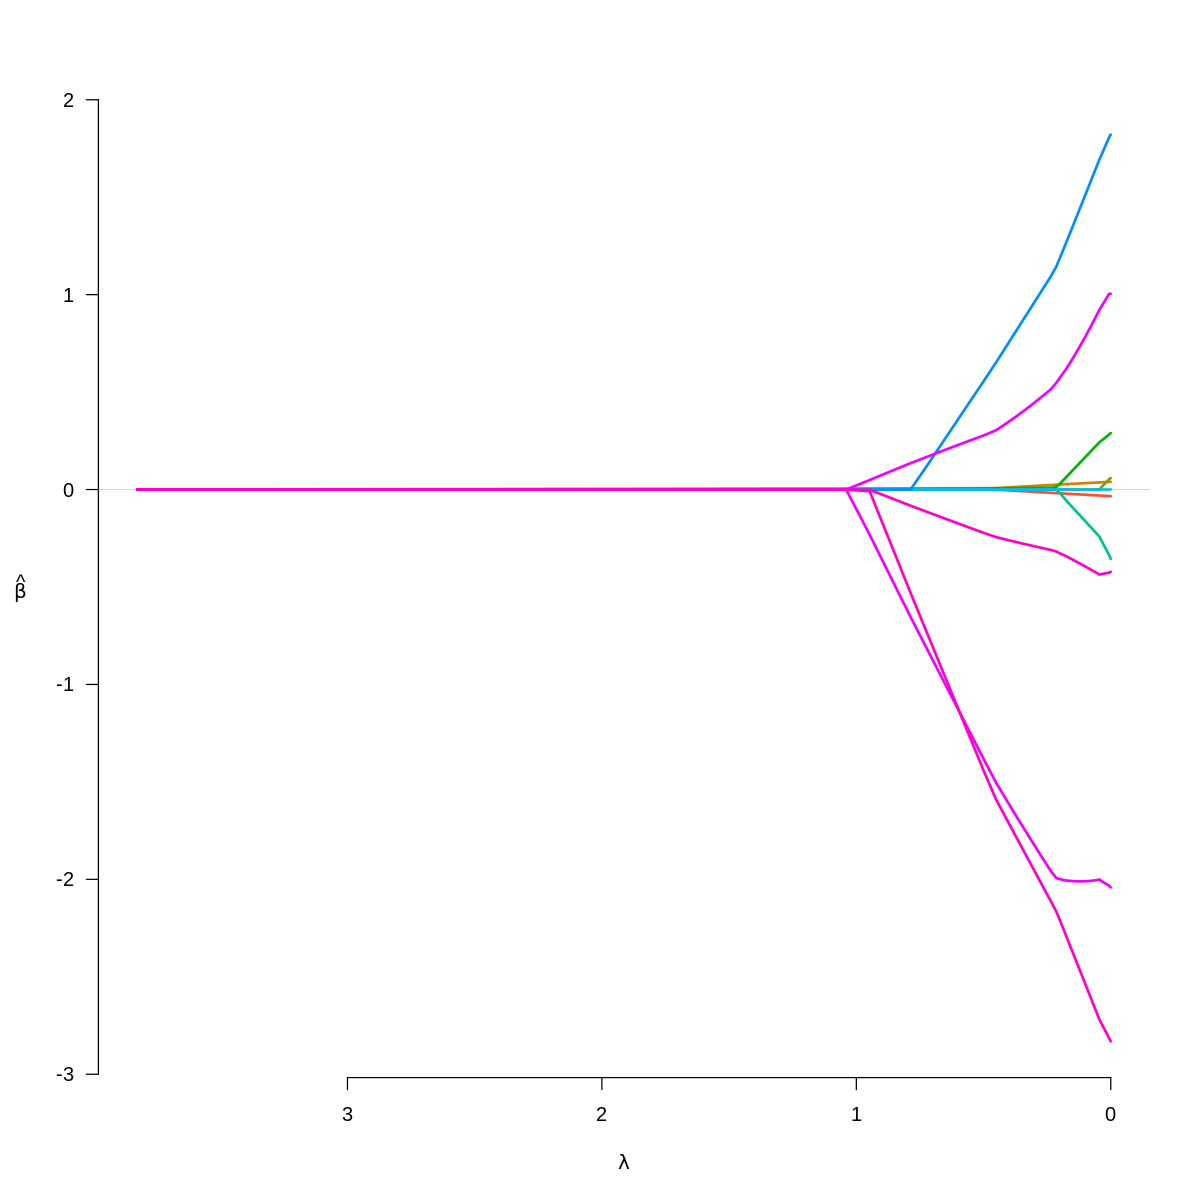

In [14]:
fit <- grpreg(model_matrix_X_train, matrix_Y_train, group = v.group, penalty="grLasso")
plot(fit)

**Figure 4** Group lasso model for `model_matrix_X_train` and `matrix_Y_train`

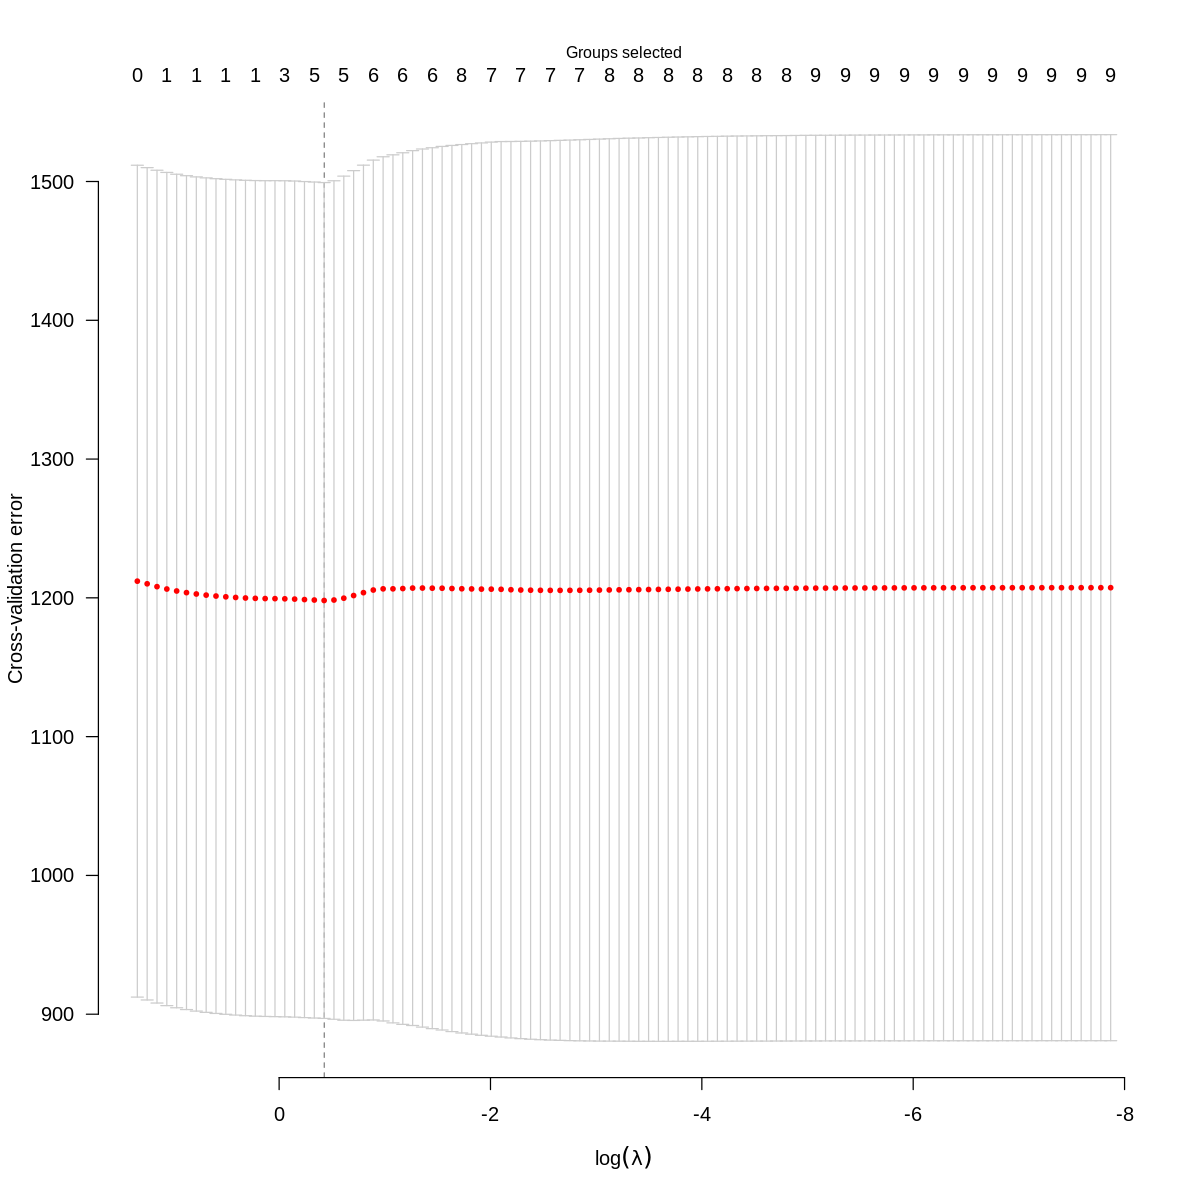

In [15]:
set.seed(0)
cvfit <- cv.grpreg(model_matrix_X_train, matrix_Y_train, v.group, penalty="grLasso")
plot(cvfit)

**Figure 5**  Group lasso model for `model_matrix_X_train` and `matrix_Y_train` with cross-validation k = 10 

In [16]:
summary(cvfit)

grLasso-penalized linear regression with n=3497, p=11
At minimum cross-validation error (lambda=0.6532):
-------------------------------------------------
  Nonzero coefficients: 7
  Nonzero groups: 5
  Cross-validation error of 1198.10
  Maximum R-squared: 0.01
  Maximum signal-to-noise ratio: 0.01
  Scale estimate (sigma) at lambda.min: 34.614

In [17]:
cat("Lambda.min = ", cvfit$lambda.min)

Lambda.min =  0.6532078

* We fit a grLasso-penalized linear regression with the training data and 14 parameters. When lambda equals to 0.6532, at minimum cross-validation error (lambda = 0.6532)

In [18]:
flight_lasso_min_add <- grpreg(model_matrix_X_train, matrix_Y_train, group = v.group, penalty="grLasso", lambda = cvfit$lambda.min)
flight_lasso_min_add$beta

,0.6532
(Intercept),-1.617325484
SCHEDULED_DEPARTURE,0.000000000
DEPARTURE_TIME,0.006376600
SCHEDULED_TIME,0.000000000
ELAPSED_TIME,0.003480743
AIR_TIME,0.000000000
DISTANCE,0.000000000
flight_day_of_weekHOILDAY,0.256735804
flight_monthSUMMER,0.202552741
flight_monthWINTER,-0.992563103


**Table 4** Beta values for all variables when lambda = 0.6532

In [19]:
library(mltools)
#OLS FULL REGRESSION & PREDICTION
flight_full_OLS_add <- lm(DEPARTURE_DELAY ~., training_flight_data)
flight_test_pred_full_OLS_add <- predict(flight_full_OLS_add, newdata = testing_flight_data)

flight_test_pred_ridge_min_add <- predict(flight_lasso_min_add,
  X = model_matrix_X_test)

flight_lasso_RMSE <- tibble(
  Model = "Group Lasso Regression with minimum MSE",
  R_MSE = rmse(
    flight_test_pred_ridge_min_add,
    testing_flight_data$DEPARTURE_DELAY
  )
)


flight_RMSE_models <- rbind(
  flight_lasso_RMSE,
  tibble(
    Model = "OLS Full Regression",
    R_MSE = rmse(
    flight_test_pred_full_OLS_add,
    testing_flight_data$DEPARTURE_DELAY
  ))
)
flight_RMSE_models


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na




Model,R_MSE
<chr>,<dbl>
Group Lasso Regression with minimum MSE,35.14459
OLS Full Regression,35.36773


**Table 5** Summary of Group Lasso Regression with minimum MSE and OLS Full Regression with their corresponding RMSE.

* Group Lasso Regression with minimum error has a smller RMSE (stronger prediction power) than the OLS full regression as we expected. Therefore we take the group lasso regression with minimum MSE as our prediction model. However, Lasso shrinks predictor variables to 0 which makes this method biased.
* We can fix this by applying post-lasso method, which is fitting ordinary least squares on the variables selected by Lasso in the testing dataset.

In [20]:
Post_Lasso_model <- lm(DEPARTURE_DELAY ~ DEPARTURE_TIME + ELAPSED_TIME + flight_day_of_week + flight_month 
                     + flight_day, testing_flight_data)
Post_Lasso_model$coefficient

(Intercept)            DEPARTURE_TIME              ELAPSED_TIME 
              2.006834946               0.007072552               0.002847214 
flight_day_of_weekHOILDAY        flight_monthSUMMER        flight_monthWINTER 
             -3.075163967              -2.101503712              -5.530014615 
flight_dayMIDDLE_OF_MONTH  flight_daySTART_OF_MONTH 
              0.064240347              -1.684448995

In [21]:
lasso_vif <-  vif(Post_Lasso_model)
lasso_vif

,GVIF,Df,GVIF^(1/(2*Df))
DEPARTURE_TIME,1.002629,1,1.001314
ELAPSED_TIME,1.004141,1,1.002069
flight_day_of_week,1.005635,1,1.002814
flight_month,1.005417,2,1.001351
flight_day,1.003952,2,1.000986


**Table 5** Variance Inflation Factor for Lasso selected variables from the testing dataset

* By applying Variance Inflation Factor (VIF), we could obseve that all of the selected variables have tiny VIFs, which supports that the group lasso method have solved the multicollinearity problem among the predictor variables in our model.

## 5. Discussion

After selecting variables and prediction by Group Lasso, we obtained a relatively accurate model. For Delta Airline, among the 13 variables, `DEPARTURE_DELAY` is positively related to `DEPARTURE_TIME`, `ELAPSED_TIME`, `flight_dayMIDDLE_OF_MONTH`, and negatively related to `flight_day_of_weekHOILDAY`, `flight_monthSUMMER`, `flight_monthWINTER`, and `flight_daySTART_OF_MONTH`. It also obtains a correlation equation:

`DEPARTURE_DELAY`= 2.01 + 0.007 * `DEPARTURE_TIME` + 0.003 * `ELAPSED_TIME` - 3.075 * `flight_day_of_weekHOILDAY` - 2.101 * `flight_monthSUMMER` - 5.530 * `flight_monthWINTER` + 0.064 * `flight_dayMIDDLE_OF_MONTH` - 1.684 * `flight_daySTART_OF_MONTH`

$$\text{flight_day_of_weekHOILDAY} = \left\{ \begin{array}{ll}
         1 & \text{If the day is Saturday or Sunday};\\
         0 & \text{if otherwise}\end{array} \right.$$

$$\text{flight_monthSUMME} = \left\{ \begin{array}{ll}
         1 & \text{If the month is between April and June};\\
         0 & \text{if otherwise}\end{array} \right.$$   
         
$$\text{flight_monthWINTER} = \left\{ \begin{array}{ll}
         1 & \text{If the month is between October and December};\\
         0 & \text{if otherwise}\end{array} \right.$$
         
$$\text{flight_dayMIDDLE_OF_MONTH} = \left\{ \begin{array}{ll}
         1 & \text{If the date is between 11 and 20};\\
         0 & \text{if otherwise}\end{array} \right.$$
         
$$\text{flight_daySTART_OF_MONTH} = \left\{ \begin{array}{ll}
         1 & \text{If the date is between 1 and 10};\\
         0 & \text{if otherwise}\end{array} \right.$$       


In general, we weren’t too surprised with what variables showed to be most effective in predicting flight delay. We found that winter months had a much larger effect in comparison to summer months which makes sense considering weather delays. We were a little surprised that the delays were affected a lot more when it was at the start of the month rather than at the end of the month. We also were surprised to see that items such as distance weren’t selected for the model, considering we thought that longer flights would more likely be delayed. Overall, the model chose variables we mostly expected, and we think it made a good prediction for flight delays.

In terms of creating the model, we saw that the R_MSE of Group Lasso Regression is 35.14459, which is less than that of OLS Full Regression (35.36773). This indicates that Group Lasso is a better predictive model than OLS Full Regression. This satisfies our expectation because the Group Lasso regression model has the ability to set the coefficients for features it does not consider valuable to zero. This means the model does some automatic feature selection to decide which features should and should not be included. In other words, the Lasso method is more strict in variable selection. This tells us that our original expectation that using Group Lasso would be a more accurate estimator is correct. However, Group Lasso estimators are biased, so we needed to use post-Lasso to offset bias. 


We believe that there are ways to improve our model. The aim of this project was to construct a prediction model about the departure delay time of Delta Airlines using existing variables to help people make their own predictions using our model. However, our study is preliminary because we used only Lasso Regression, which is only used in additive models, throughout the process. It cannot achieve 100% accuracy. So in future studies, we would consider trying to include interactive models and finding more relevant variables to improve the accuracy of the predictions.

As well, we only selected the Delta airline, and even then narrowed down sample size due to the fact that we didn’t want our data set to be too large for the project. Considering we are trying to create the best possible model, including more data points is another way to improve the accuracy of the model. As well, this would tell us interesting things such as if there is a difference in delays between airlines, and also if other factors are important for delays to other airlines. This brings us many questions we could have for future projects, such as:
- Are there other factors that can help predict flight delays that weren’t included in this study?
- Are some airlines more likely to have flight delays than others?
- What are the cost effects of these flight delays, and how important is it to airline companies?
- Is there a way that we can reduce flight delays based on factors we found directly affected them?



## 6. References

Air Transport Action Group (2022). Social and economic benefits of Aviation. (n.d.). https://www.atag.org/our-activities/social-and-economic-benefits-of-aviation.html 

Trefis Team (2016), What Is The Impact Of Flight Delays? https://www.trefis.com/stock/dal/articles/375013/what-is-the-impact-of-flight-delays/2016-08-31

U.S. Department of Transportation (2017, February 9). 2015 flight delays and cancellations. Kaggle. Retrieved November 4, 2022, from https://www.kaggle.com/datasets/usdot/flight-delays 

Wang, Y., Zhu, J., & Liu, C. (2019). The analysis of the influence of delay absorbing sequence on flight delay propagation. IOP Conference Series: Materials Science and Engineering, 688(2), 022006. https://doi.org/10.1088/1757-899x/688/2/022006 

Wikipedia (2022). Delta Air Lines. https://en.wikipedia.org/wiki/Delta_Air_Lines
